In [1]:
import os
from obspy import read, read_inventory, UTCDateTime

In [2]:
file_path = '/media/harry/Elements/UoE Node Data/UEA_nodes_mseed_mV/453003479.1.2025.03.31.13.01.50.000.Z.miniseed'
st_in = read(file_path)
print(st_in)
print(len(st_in))

1 Trace(s) in Stream:
5J.03479..DPZ | 2025-03-31T13:01:50.000000Z - 2025-04-01T00:00:00.000000Z | 4000.0 Hz, 157960001 samples
1


1 Trace(s) in Stream:
5J.03479..DPZ | 2025-03-31T17:00:00.000000Z - 2025-03-31T18:00:00.000000Z | 4000.0 Hz, 14400001 samples


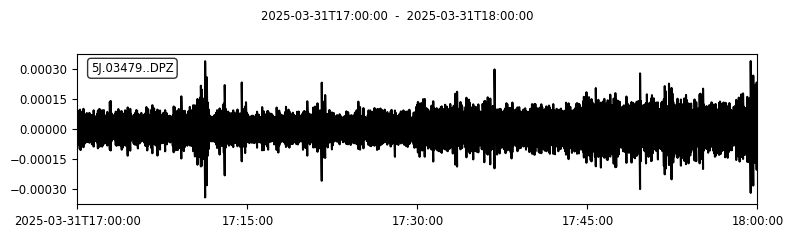

In [3]:
t0 = UTCDateTime('2025-03-31T17:00:00.00')
t1 = t0 + (60*60)

st = st_in.copy()
st = st.slice(t0, t1)
for tr in st: tr.data *= 0.001      # convert from mV to V
# st = st.decimate(8)     # decimate to 500 Hz (factor of 8)
print(st)
st.plot();

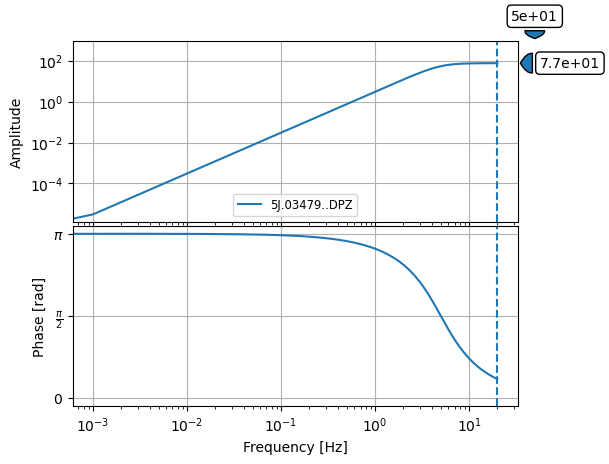

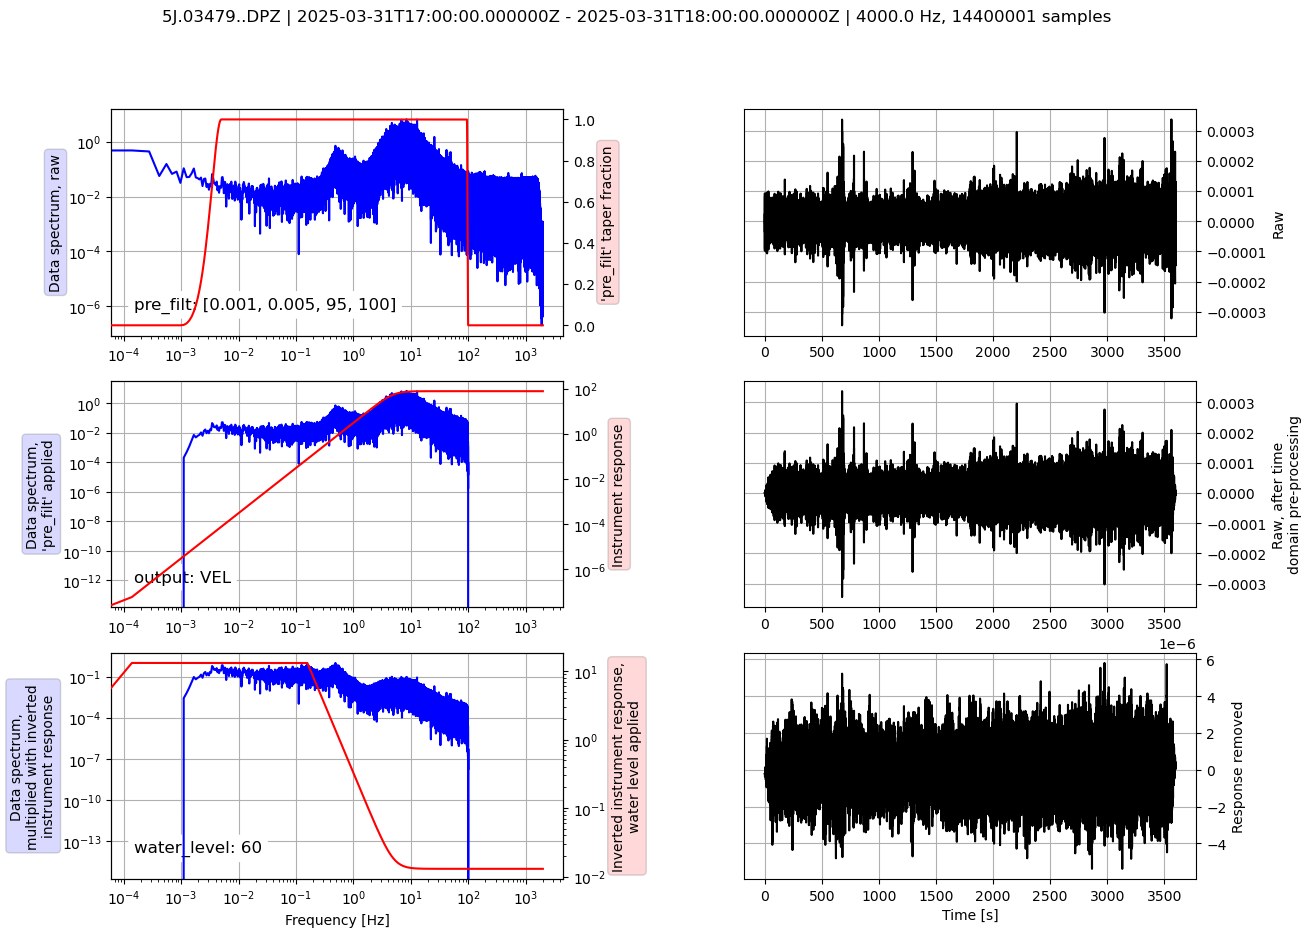

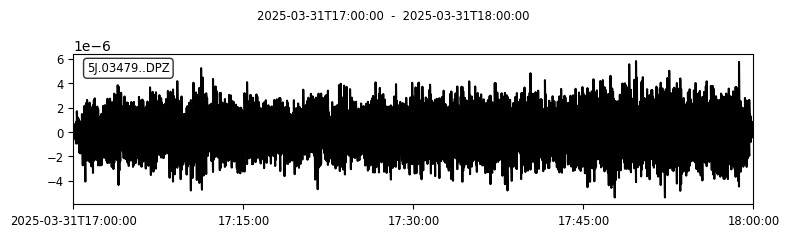

In [4]:
inv_path = '/media/harry/Elements/UoE Node Data/RESP.5J.03479..DPZ.DTSOLO.5.1850.43000.76_6'
# inv_path = '/media/harry/Elements/UoE Node Data/iris_resp_file'
inv = read_inventory(inv_path)
# print(inv)
inv.plot_response(min_freq=0.001)

st.remove_response(inventory=inv, pre_filt = [0.001, 0.005, 95, 100], plot=True)
st.plot();